In [1]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.3.0+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 43.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [3]:
def conv(v, w):
    c = np.zeros(v.shape)
    for n in range(len(v)):
        c[n] = 0
        for m in range(len(v)):
            c[n] += v[m] * w[n - m]
    return c

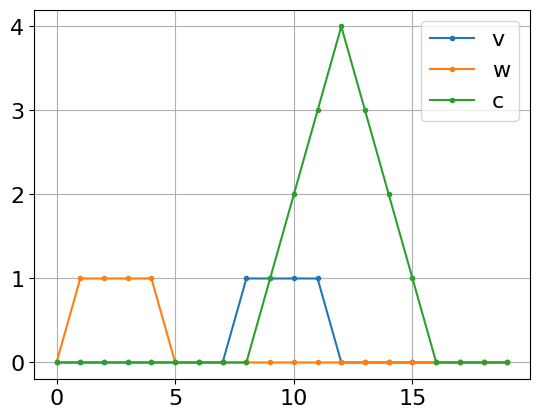

In [4]:
N = 20
v = np.zeros(N)
v[8:12] = 1
w = np.zeros(N)
w[1:5] = 1
c = conv(v, w)

fig = plt.figure()
ax = fig.gca()
ax.plot(v, '.-')
ax.plot(w, '.-')
ax.plot(c, '.-')
ax.legend(['v', 'w', 'c'])
ax.grid(True)

In [5]:
v, w = np.random.rand(N), np.random.rand(N)
conv(v, w)

array([3.91438023, 3.24979681, 3.81596179, 3.44460556, 3.552655  ,
       3.49241117, 3.89616052, 4.1882035 , 3.95028547, 3.93927512,
       3.48849434, 3.07254891, 3.96691214, 3.99315768, 4.07606928,
       4.06153522, 3.58560137, 3.81584042, 3.54948298, 3.50306365])

In [6]:
from scipy.fft import fft, ifft # Fast Fourier Transform / Inverse FFT
np.abs(ifft(fft(v) * fft(w)))

array([3.91438023, 3.24979681, 3.81596179, 3.44460556, 3.552655  ,
       3.49241117, 3.89616052, 4.1882035 , 3.95028547, 3.93927512,
       3.48849434, 3.07254891, 3.96691214, 3.99315768, 4.07606928,
       4.06153522, 3.58560137, 3.81584042, 3.54948298, 3.50306365])

In [7]:
def matrix_U(N):
    u = lambda n, N: np.cos(2 * np.pi / N * n * np.arange(N)) - 1j * np.sin(2 * np.pi / N * n * np.arange(N))
    U = np.empty((N, 0))
    for n in range(N):
        U = np.c_[U, u(n, N)]
    return U


def fourier_transform(v):
    N = v.shape[0]
    U = matrix_U(N)
    return U @ v


def inverse_fourier_transform(v):
    N = v.shape[0]
    U = matrix_U(N)
    return (U.conj().transpose() @ v) / N

In [8]:
fft(v) - fourier_transform(v)

array([ 0.00000000e+00-0.00000000e+00j,  4.44089210e-16+6.66133815e-16j,
        2.22044605e-16+2.22044605e-16j,  2.22044605e-16+8.32667268e-16j,
        1.11022302e-16+4.44089210e-16j,  6.49480469e-15+1.38777878e-16j,
       -3.21964677e-15-1.38777878e-15j, -4.44089210e-16-1.11022302e-16j,
        1.33226763e-15+1.22124533e-15j, -6.66133815e-16+2.55351296e-15j,
        0.00000000e+00+6.76830510e-15j, -3.66373598e-15+2.33146835e-15j,
       -2.10942375e-15-3.66373598e-15j, -4.66293670e-15-5.55111512e-15j,
       -3.55271368e-15-4.77395901e-15j,  6.38378239e-16-8.32667268e-16j,
       -1.22124533e-15+1.33226763e-15j, -6.88338275e-15-1.19071419e-14j,
        1.55431223e-15-8.88178420e-16j, -3.55271368e-15+1.55431223e-15j])

In [9]:
ifft(v) - inverse_fourier_transform(v)

array([-1.11022302e-16-0.00000000e+00j, -1.38777878e-17-4.43438689e-17j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00-4.51028104e-17j,
        1.73472348e-17-6.93889390e-18j,  3.21791205e-16+0.00000000e+00j,
       -1.66533454e-16+7.28583860e-17j, -3.98986399e-17+0.00000000e+00j,
        7.63278329e-17-6.93889390e-17j, -4.16333634e-17-1.17961196e-16j,
        0.00000000e+00-3.38415255e-16j, -1.80411242e-16-1.04083409e-16j,
       -9.71445147e-17+1.94289029e-16j, -2.51534904e-16+2.77555756e-16j,
       -1.66533454e-16+2.42861287e-16j,  2.94902991e-17+3.29597460e-17j,
       -6.24500451e-17-6.93889390e-17j, -3.74700271e-16+5.88071258e-16j,
        9.02056208e-17+4.16333634e-17j, -1.66533454e-16-4.99817202e-17j])

In [10]:
U = matrix_U(N)
np.abs((U.conj().transpose() / N) @ ((U @ v) * (U @ w)))

array([3.91438023, 3.24979681, 3.81596179, 3.44460556, 3.552655  ,
       3.49241117, 3.89616052, 4.1882035 , 3.95028547, 3.93927512,
       3.48849434, 3.07254891, 3.96691214, 3.99315768, 4.07606928,
       4.06153522, 3.58560137, 3.81584042, 3.54948298, 3.50306365])

In [11]:
conv(v, w)

array([3.91438023, 3.24979681, 3.81596179, 3.44460556, 3.552655  ,
       3.49241117, 3.89616052, 4.1882035 , 3.95028547, 3.93927512,
       3.48849434, 3.07254891, 3.96691214, 3.99315768, 4.07606928,
       4.06153522, 3.58560137, 3.81584042, 3.54948298, 3.50306365])